# Introduction
Exchange rate has a big inpact on country economy as the slight change in currency rate can affect the economy in a lot ot ways. The rate of a currency changes drastically in every country over time . This notebook contain my analysis on the exchange rate data till date acquired through an api request. The api used is the exchange rate api on **apilayer**.


### Contents
- [Importing Libraries](#Importing-Libraries)
- [Api Request](#Making-api-request)
- [Importing data into a dataframe](#Importing-data-into-dataframe)
- [Data Cleaning](#Data-Cleaning)
- [Analysis & Visualization](#Analysis-and-Visualization)
- [Conclusion](#Conclusion)



### Variables definition
- url - api url
- headers - a dictionary that contain the api key
- response - api request respone
- result_data - acquired data from the api
- data - indicate the result_data in json format
- rates_data - exchange rates data for all the currencies for all the days
- df - dataframe
- arr - numpy array
- rate_values - all the rates value as numpy array
- min loc - location of the lowest rate
- ser2 - dataframe that contain lowest rates for each currecny
- index_min - index of the lowest rate
- fig - matplotlib pyplot figure
- a - often represent matplotlib pyplot figure axes but also used at times in iteration
- wa_currencies - dictionary of currenciesand the name of the top 3 countries in africa by gdp capital 
- wa_rates - rate of wa_currencies
- month_list - list that contains 3 letters for each month in the dataframe
- ngn_df - dataframe for ngn rates
- ngn_df2 - ngn_df grouped by month name with the mean of the rates


# Importing Libraries

In [1]:
import requests as req #python library to make api request
import json #to parse api data in json format
import pandas as pd #data analysis
import matplotlib.pyplot as plt #visualization
import seaborn as sns 
import numpy as np #to work with array
from datetime import datetime
%matplotlib inline

# Making api request

In [3]:
'''
make an api url requests with queries,start_date as 2022-01-01,end_date as today and
base currency(currency which other currencies will be based on)
as USD
'''
url = "https://api.apilayer.com/exchangerates_data/timeseries?start_date=2022-01-01&end_date=2022-10-05&base=USD"
#input api key
headers= {
  "apikey": "api-key"
}

response = req.get(url, headers=headers)

status_code = response.status_code #check the status code
result_data = response.text


In [4]:
status_code

200

In [5]:
data = json.loads(result_data) #load the data in json format

In [6]:
data.keys() #the keys

dict_keys(['success', 'timeseries', 'start_date', 'end_date', 'base', 'rates'])

In [8]:
data['success']

True

In [9]:
data['timeseries']

True

In [10]:
data['start_date']

'2022-01-01'

In [11]:
data['end_date']

'2022-10-05'

In [12]:
data['base']

'USD'

In [13]:
#rates contain the rate of all the currencies for each day
rate_data = data['rates']

# Importing data into dataframe

In [20]:
rates = list()
for dates in rate_data.keys():
    daily = rate_data[dates]
    df = pd.DataFrame(daily,index=[dates])
    rates.append(df)

In [21]:
#concat all the data
df = pd.concat(rates)

In [22]:
df.head(5)

,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
2022-01-01,3.673042,103.750404,106.650403,480.234325,1.802591,550.590403,102.689974,1.375800,1.8000,1.703970,...,0.000547,2.70255,0.714652,579.503602,105.850364,250.250364,15.951045,9001.203593,16.663427,321.999592
2022-01-02,3.672980,103.749983,106.650326,480.234325,1.802591,550.590435,102.664691,1.376179,1.8000,1.698647,...,0.000547,2.70255,0.714652,579.499504,105.850128,250.249584,15.964896,9001.202654,16.663427,321.999592
2022-01-03,3.673103,103.750299,106.249880,481.590005,1.802973,554.203977,102.958502,1.389502,1.8005,1.701522,...,0.000554,2.70255,0.714795,578.495079,106.250557,250.250269,15.874497,9001.202677,16.674184,321.999592
2022-01-04,3.673096,104.899369,105.874950,482.301630,1.801500,553.427992,103.104100,1.381105,1.8000,1.698131,...,0.000551,2.70255,0.713539,580.492727,106.125034,250.249886,16.037760,9001.200930,16.718437,321.999592
2022-01-05,3.673102,105.250158,106.902530,483.164239,1.802797,552.652983,103.102801,1.384754,1.8005,1.691373,...,0.000552,2.70255,0.716268,579.501261,105.550109,250.249682,15.893898,9001.187415,16.770433,321.999592


In [23]:
df.tail(5)

,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
2022-10-01,3.673020,88.503991,118.950403,405.650403,1.803199,433.405504,147.301442,1.561524,1.8000,1.703970,...,0.000602,2.70255,0.784155,582.000332,66.925037,250.250364,18.091040,9001.203593,15.783448,321.999592
2022-10-02,3.673020,88.498126,118.949783,405.649830,1.803199,433.405498,147.369401,1.557899,1.8000,1.701624,...,0.000601,2.70255,0.784155,582.000338,66.925016,250.249517,18.067504,9001.196767,15.783448,321.999592
2022-10-03,3.673103,88.503112,118.949589,406.220289,1.801732,434.110150,148.257641,1.538071,1.8025,1.699000,...,0.000588,2.70255,0.780939,667.500765,121.702808,250.249925,17.737650,9001.232138,15.720478,321.999592
2022-10-04,3.673097,88.000072,118.388979,406.490298,1.803148,434.815297,148.583548,1.535167,1.8000,1.704591,...,0.000580,2.70255,0.781259,663.447320,121.701184,250.250323,17.642895,9001.195004,15.781579,321.999592
2022-10-05,3.673050,87.783298,118.354226,405.221843,1.802443,434.815298,148.612436,1.549655,1.8000,1.697491,...,0.000586,2.70255,0.776355,660.977121,120.849987,250.249920,17.758205,9001.196211,15.776405,321.999592


In [24]:
df.shape

(278, 168)

In [25]:
#check all the currencies
df.columns.to_numpy()

array(['AED', 'AFN', 'ALL', 'AMD', 'ANG', 'AOA', 'ARS', 'AUD', 'AWG',
       'AZN', 'BAM', 'BBD', 'BDT', 'BGN', 'BHD', 'BIF', 'BMD', 'BND',
       'BOB', 'BRL', 'BSD', 'BTC', 'BTN', 'BWP', 'BYN', 'BYR', 'BZD',
       'CAD', 'CDF', 'CHF', 'CLF', 'CLP', 'CNY', 'COP', 'CRC', 'CUC',
       'CUP', 'CVE', 'CZK', 'DJF', 'DKK', 'DOP', 'DZD', 'EGP', 'ERN',
       'ETB', 'EUR', 'FJD', 'FKP', 'GBP', 'GEL', 'GGP', 'GHS', 'GIP',
       'GMD', 'GNF', 'GTQ', 'GYD', 'HKD', 'HNL', 'HRK', 'HTG', 'HUF',
       'IDR', 'ILS', 'IMP', 'INR', 'IQD', 'IRR', 'ISK', 'JEP', 'JMD',
       'JOD', 'JPY', 'KES', 'KGS', 'KHR', 'KMF', 'KPW', 'KRW', 'KWD',
       'KYD', 'KZT', 'LAK', 'LBP', 'LKR', 'LRD', 'LSL', 'LTL', 'LVL',
       'LYD', 'MAD', 'MDL', 'MGA', 'MKD', 'MMK', 'MNT', 'MOP', 'MRO',
       'MUR', 'MVR', 'MWK', 'MXN', 'MYR', 'MZN', 'NAD', 'NGN', 'NIO',
       'NOK', 'NPR', 'NZD', 'OMR', 'PAB', 'PEN', 'PGK', 'PHP', 'PKR',
       'PLN', 'PYG', 'QAR', 'RON', 'RSD', 'RUB', 'RWF', 'SAR', 'SBD',
       'SCR', 'SDG',

In [26]:
#sort columns alphabetical
sort_col = sorted(df.columns.to_list())

In [27]:
df = df.loc[:,sort_col]

In [30]:
df.to_csv('exchange_rate.csv')

In [156]:
df = pd.read_csv('exchange_rate.csv')

# Data Cleaning

In [3]:
#how many duplicates
df.duplicated().sum()

0

In [4]:
df.head(4)

,Unnamed: 0,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
0,2022-01-01,3.673042,103.750404,106.650403,480.234325,1.802591,550.590403,102.689974,1.375800,1.8000,...,0.000547,2.70255,0.714652,579.503602,105.850364,250.250364,15.951045,9001.203593,16.663427,321.999592
1,2022-01-02,3.672980,103.749983,106.650326,480.234325,1.802591,550.590435,102.664691,1.376179,1.8000,...,0.000547,2.70255,0.714652,579.499504,105.850128,250.249584,15.964896,9001.202654,16.663427,321.999592
2,2022-01-03,3.673103,103.750299,106.249880,481.590005,1.802973,554.203977,102.958502,1.389502,1.8005,...,0.000554,2.70255,0.714795,578.495079,106.250557,250.250269,15.874497,9001.202677,16.674184,321.999592
3,2022-01-04,3.673096,104.899369,105.874950,482.301630,1.801500,553.427992,103.104100,1.381105,1.8000,...,0.000551,2.70255,0.713539,580.492727,106.125034,250.249886,16.037760,9001.200930,16.718437,321.999592


In [159]:
df.rename(columns={'Unnamed: 0':'DATE'},inplace=True)

In [6]:
'''
There are over 160 columns in the dataframe, so checking for null values directly will only show first 5 and last five columns
so to make sure all columns are shown, i intend to create a numpy array and add column name and sum of nan for every columns
'''
arr = np.array([])
ser = df.isnull().sum()
for value in ser.index:
    arr = np.append(arr,[value,ser.loc[value]],axis=0)

In [7]:
arr

array(['DATE', '0', 'AED', '0', 'AFN', '0', 'ALL', '0', 'AMD', '0', 'ANG',
       '0', 'AOA', '0', 'ARS', '0', 'AUD', '0', 'AWG', '0', 'AZN', '0',
       'BAM', '0', 'BBD', '0', 'BDT', '0', 'BGN', '0', 'BHD', '0', 'BIF',
       '0', 'BMD', '0', 'BND', '0', 'BOB', '0', 'BRL', '0', 'BSD', '0',
       'BTC', '0', 'BTN', '0', 'BWP', '0', 'BYN', '0', 'BYR', '0', 'BZD',
       '0', 'CAD', '0', 'CDF', '0', 'CHF', '0', 'CLF', '0', 'CLP', '0',
       'CNY', '0', 'COP', '0', 'CRC', '0', 'CUC', '0', 'CUP', '0', 'CVE',
       '0', 'CZK', '0', 'DJF', '0', 'DKK', '0', 'DOP', '0', 'DZD', '0',
       'EGP', '0', 'ERN', '2', 'ETB', '0', 'EUR', '0', 'FJD', '0', 'FKP',
       '2', 'GBP', '0', 'GEL', '0', 'GGP', '2', 'GHS', '0', 'GIP', '2',
       'GMD', '0', 'GNF', '0', 'GTQ', '0', 'GYD', '0', 'HKD', '0', 'HNL',
       '0', 'HRK', '0', 'HTG', '0', 'HUF', '0', 'IDR', '0', 'ILS', '0',
       'IMP', '2', 'INR', '0', 'IQD', '0', 'IRR', '0', 'ISK', '0', 'JEP',
       '2', 'JMD', '0', 'JOD', '0', 'JPY', '0', '

In [160]:
df.set_index('DATE',inplace=True)

In [161]:
#fill all na with the preceeding values
df.fillna(method='ffill', inplace=True)

In [10]:
arr = np.array([])
ser = df.isnull().sum()
for value in ser.index:
    arr = np.append(arr,[value,ser.loc[value]],axis=0)

In [11]:
arr

array(['AED', '0', 'AFN', '0', 'ALL', '0', 'AMD', '0', 'ANG', '0', 'AOA',
       '0', 'ARS', '0', 'AUD', '0', 'AWG', '0', 'AZN', '0', 'BAM', '0',
       'BBD', '0', 'BDT', '0', 'BGN', '0', 'BHD', '0', 'BIF', '0', 'BMD',
       '0', 'BND', '0', 'BOB', '0', 'BRL', '0', 'BSD', '0', 'BTC', '0',
       'BTN', '0', 'BWP', '0', 'BYN', '0', 'BYR', '0', 'BZD', '0', 'CAD',
       '0', 'CDF', '0', 'CHF', '0', 'CLF', '0', 'CLP', '0', 'CNY', '0',
       'COP', '0', 'CRC', '0', 'CUC', '0', 'CUP', '0', 'CVE', '0', 'CZK',
       '0', 'DJF', '0', 'DKK', '0', 'DOP', '0', 'DZD', '0', 'EGP', '0',
       'ERN', '0', 'ETB', '0', 'EUR', '0', 'FJD', '0', 'FKP', '0', 'GBP',
       '0', 'GEL', '0', 'GGP', '0', 'GHS', '0', 'GIP', '0', 'GMD', '0',
       'GNF', '0', 'GTQ', '0', 'GYD', '0', 'HKD', '0', 'HNL', '0', 'HRK',
       '0', 'HTG', '0', 'HUF', '0', 'IDR', '0', 'ILS', '0', 'IMP', '0',
       'INR', '0', 'IQD', '0', 'IRR', '0', 'ISK', '0', 'JEP', '0', 'JMD',
       '0', 'JOD', '0', 'JPY', '0', 'KES', '0', 'K

# Analysis and Visualization

### The highest and lowest rate so far , the dates and the currency

In [12]:
rate_values = df.values

In [182]:
min_dict = dict(df.min())
for key,value in min_dict.items():
    if value == min(min_dict.values()):
        column = key
        row = value

In [188]:
print('The lowest rate so far is : ')
df[df[column]==row][column]

The lowest rate so far is : 


DATE
2022-01-01    0.000021
Name: BTC, dtype: float64

In [189]:
max_dict = dict(df.max())
for key,value in max_dict.items():
    if value == max(max_dict.values()):
        column = key
        row = value

In [215]:
ser2 = df[df[column]==row][column]
index_max = ser2.idxmax()
ser_to_df = pd.DataFrame(ser2)

In [231]:
import warnings
warnings.filterwarnings('ignore')
max_value = ser_to_df.max()
print(f'The highest rate ever this year is  is {np.int(max_value.values)}  more details below')
max_value

The highest rate ever this year is  is 213830222338  more details below


VEF    2.138302e+11
dtype: float64

In [232]:
df['DATE'] = df.index

In [233]:
df['DATE'] = pd.to_datetime(df['DATE'])

### BTC rates over time as the currency that experience the lowest rate so far


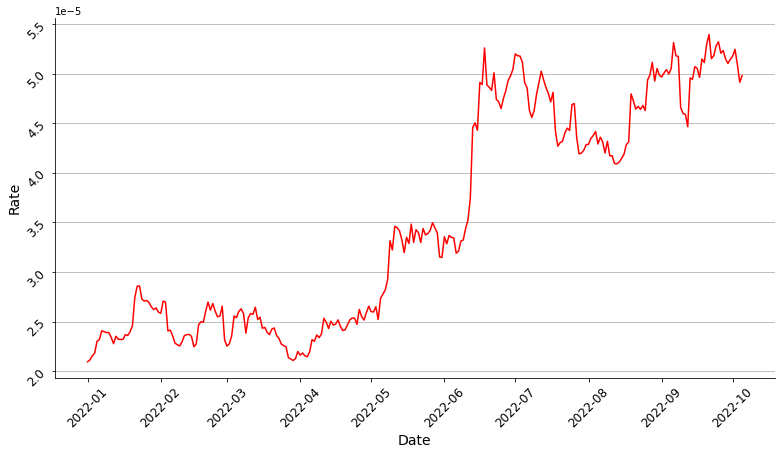

In [235]:
fig = plt.figure(figsize=(10,5))
a = fig.add_axes([0,0,1,1])
sns.lineplot(x = df['DATE'], y = df['BTC'], color='red')
a.spines['top'].set_color(None)
a.spines['right'].set_color(None)
a.set_xlabel('Date', fontsize=14)
a.set_ylabel('Rate', fontsize=14)
a.tick_params(axis='both', labelsize=12, labelrotation=45)
a.grid(axis='y')
plt.show()

### VEF rates over time as the currency that experience the lowest rate so far


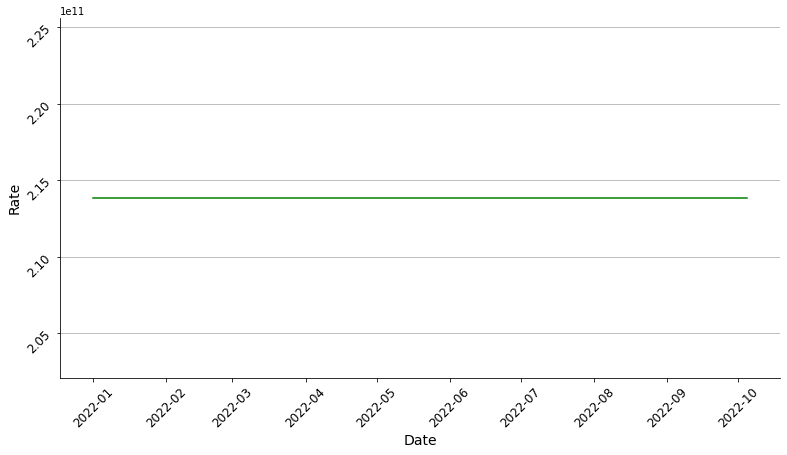

In [236]:
fig = plt.figure(figsize=(10,5))
a = fig.add_axes([0,0,1,1])
sns.lineplot(x = df['DATE'], y = df['VEF'], color='green')
a.spines['top'].set_color(None)
a.spines['right'].set_color(None)
a.set_xlabel('Date', fontsize=14)
a.set_ylabel('Rate', fontsize=14)
a.tick_params(axis='both', labelsize=12, labelrotation=45)
a.grid(axis='y')
plt.show()

### NGN rates over time

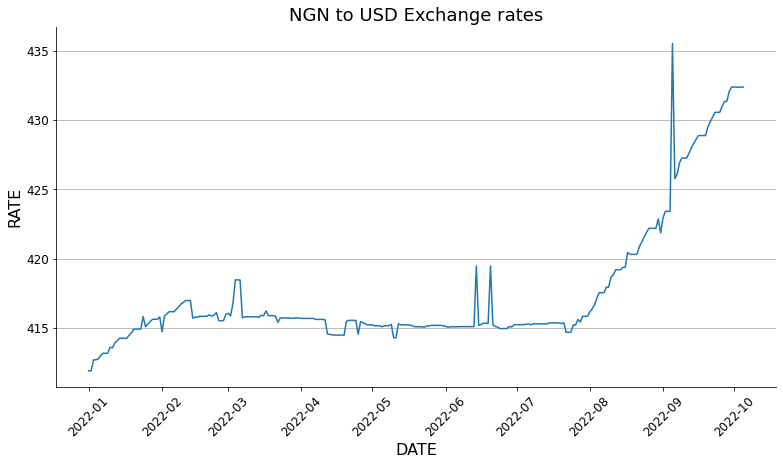

In [18]:
fig = plt.figure(figsize=[10,5])
a = fig.add_axes([0,0,1,1])
sns.lineplot(x = df['DATE'],y = df['NGN'], ax = a)
a.tick_params(axis='x',labelrotation=45,labelsize=12)
a.set_title('NGN to USD Exchange rates', fontsize=18)
a.set_xlabel('DATE', fontsize=16)
a.set_ylabel('RATE', fontsize=16)
a.spines['right'].set_color(None)
a.spines['top'].set_color(None)
a.grid(axis='y')
a.tick_params(axis='y', labelsize=12)
plt.show()

### EURO rates over time

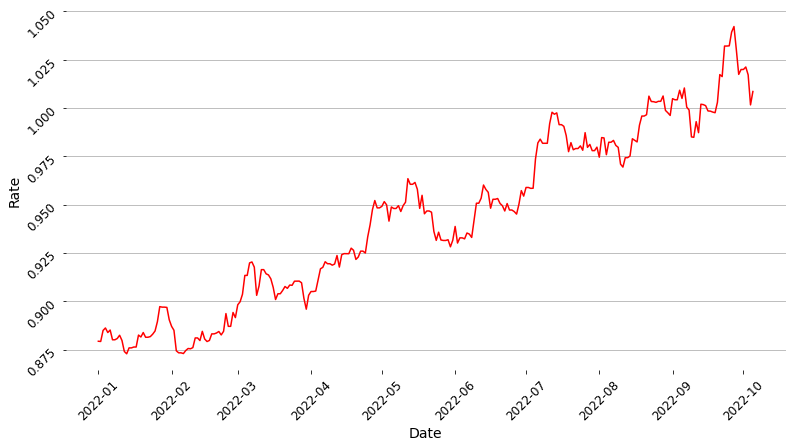

In [146]:
fig = plt.figure(figsize=(10,5))
a = fig.add_axes([0,0,1,1])
sns.lineplot(x = df['DATE'], y = df['EUR'], color='red')
a.spines['bottom'].set_color(None)
a.spines['top'].set_color(None)
a.spines['left'].set_color(None)
a.spines['right'].set_color(None)
a.set_xlabel('Date', fontsize=14)
a.set_ylabel('Rate', fontsize=14)
a.tick_params(axis='both', labelsize=12, labelrotation=45)
a.grid(axis='y')
plt.show()

### Relationship between NGN and EUR

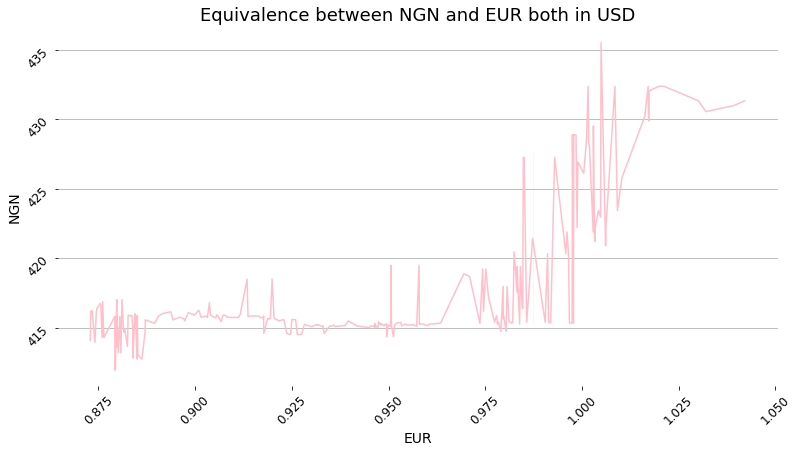

In [20]:
fig = plt.figure(figsize=(10,5))
a = fig.add_axes([0,0,1,1])
sns.lineplot(x = df['EUR'], y = df['NGN'], color='pink')
a.spines['bottom'].set_color(None)
a.spines['top'].set_color(None)
a.spines['left'].set_color(None)
a.spines['right'].set_color(None)
a.set_title('Equivalence between NGN and EUR both in USD', fontsize=18)
a.set_xlabel('EUR', fontsize=14)
a.set_ylabel('NGN', fontsize=14)
a.tick_params(axis='both', labelsize=12, labelrotation=45)
a.grid(axis='y')
plt.show()

### Analysis on Kuwait Dinar as one of the best currency

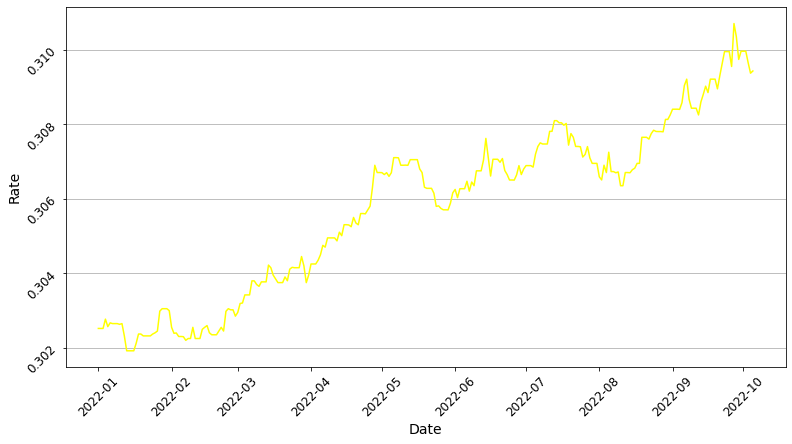

In [145]:
fig = plt.figure(figsize=(10,5))
a = fig.add_axes([0,0,1,1])
sns.lineplot(x = df['DATE'], y = df['KWD'], color='yellow')
a.set_xlabel('Date', fontsize=14)
a.set_ylabel('Rate', fontsize=14)
a.tick_params(axis='both', labelsize=12, labelrotation=45)
a.grid(axis='y')
plt.show()

### Exchange rates for the top 3 african countries by gdp

In [137]:
wa_currencies = {'ngn':'Nigeria','egp':'Egpyt','zar':'South Africa'}
wa_rates = df.loc[:,[a.upper() for a in wa_currencies.keys()]]

In [138]:
wa_rates

,NGN,EGP,ZAR
DATE,,,
2022-01-01,411.950377,15.709763,15.951045
2022-01-02,411.950333,15.705895,15.964896
2022-01-03,412.739897,15.743602,15.874497
2022-01-04,412.739603,15.730698,16.037760
2022-01-05,412.804591,15.716009,15.893898
...,...,...,...
2022-10-01,432.370377,19.538049,18.091040
2022-10-02,432.370160,19.558802,18.067504
2022-10-03,432.350355,19.622705,17.737650


In [139]:
wa_rates['DATE'] = pd.to_datetime(wa_rates.index)

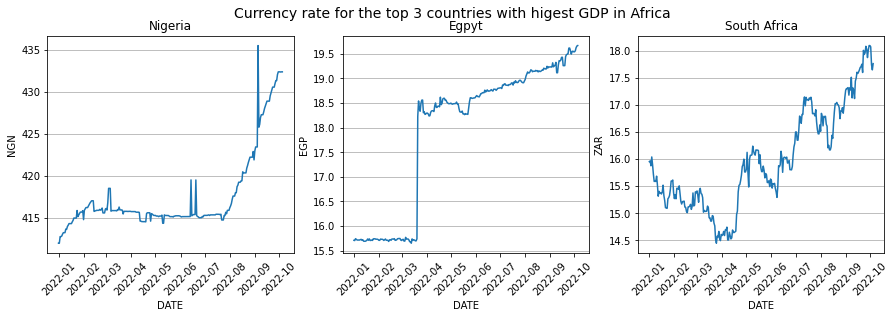

In [142]:
fig = plt.figure(figsize=(15,4))
a = 1
for value in wa_rates.columns:
    if value != 'DATE':
        plt.subplot(1,3,a)
        sns.lineplot(x = wa_rates['DATE'], y = wa_rates[value])
        plt.tick_params(axis = 'x', labelrotation=45)
        plt.grid(axis='y')
        a+=1
        plt.title(wa_currencies[value.lower()])
plt.suptitle('Currency rate for the top 3 countries with higest GDP in Africa', fontsize=14)
plt.show()

In [91]:
month_list = []
for value in df.DATE.dt.month_name():
    month_list.append(value[:3])
df['MONTH'] = month_list

In [115]:
ngn_df = pd.DataFrame({'date':df['NGN'].index, 'rate':df['NGN'].values})

In [126]:
ngn_df['month'] = [str(a)[:3] for a in pd.to_datetime(ngn_df['date']).dt.month_name()]
ngn_df['month_num'] = [a for a in pd.to_datetime(ngn_df['date']).dt.month]
ngn_df.sort_values('month_num',inplace=True)

In [127]:
ngn_df

,date,rate,month,month_num
0,2022-01-01,411.950377,Jan,1
30,2022-01-31,415.829817,Jan,1
29,2022-01-30,415.659962,Jan,1
28,2022-01-29,415.660377,Jan,1
27,2022-01-28,415.660377,Jan,1
...,...,...,...,...
276,2022-10-04,432.370262,Oct,10
273,2022-10-01,432.370377,Oct,10
274,2022-10-02,432.370160,Oct,10
275,2022-10-03,432.350355,Oct,10


In [130]:
ngn_df2 = ngn_df.groupby(['month'])['rate','month_num'].mean()

C:\Users\Enoch\AppData\Local\Temp\ipykernel_6380\2044488377.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ngn_df2 = ngn_df.groupby(['month'])['rate','month_num'].mean()


In [133]:
ngn_df2.sort_values('month_num',inplace=True)
ngn_df2.drop('month_num', axis=1, inplace=True)

In [136]:
print('Month over month analysis on average NGN rates ')
ngn_df2.shift(1,axis=0)

Month over month analysis on average NGN rates 


,rate
month,
Jan,NaN
Feb,414.220975
Mar,416.085016
Apr,416.123064
May,415.265581
Jun,415.144850
Jul,415.439536
Aug,415.335930
Sep,419.678804


# Conclusion

From the analysis and visualization, i arrived at these conclusions:
- NGN reach its highest in september but slightly decreases towards the end of september and started increasing back in october 
- Although there are a lot of rise and fall in EUR butwhenever there is a drop, the rate tend to increase more than it was before the drop and for now , the rate is dropping
- VEF rates stays the same through out
- 1 USD has never been more than 0.5KWD this year, this show that KWD is really a strong currency
- Egypt experience extreme rise in rate in March and the rate hasn't drop back since then
- There are rises and falls in south africa currency over time
- NGN tend to increase as EUR increases until EUR reach over 1.0
- There hasn't been high drop or rise in the average rates of ngn over the months
<br></br>
_[This the link to the api](https://apilayer.com/marketplace/exchangerates_data-ap)